In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import (Input,
    Conv2D, MaxPooling2D, BatchNormalization,
    GlobalAveragePooling2D, Dense, Dropout
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt  
from tensorflow.keras.models import Model


# Set random seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Paths to datasets
train_path = './train'
valid_path = './valid'


# Parameters
img_height, img_width = 224, 224
batch_size = 8
num_classes = 2
l2_lambda = 0.0001

# Define data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,

    rotation_range=30,         # Increased rotation
    brightness_range=[0.6, 1.4],  # Broader brightness range
    width_shift_range=0.2,     # Larger horizontal shift
    height_shift_range=0.2,    # Larger vertical shift
    shear_range=0.2,           # Larger shear
    zoom_range=0.2,            # Larger zoom
    channel_shift_range=20,    # Increase color shift
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen = ImageDataGenerator(rescale=1./255)

train_batches = train_datagen.flow_from_directory(
    directory=train_path, target_size=(img_height, img_width), shuffle=True, batch_size=batch_size, class_mode='binary',seed=seed
)

valid_batches = datagen.flow_from_directory(
    directory=valid_path, target_size=(img_height, img_width), batch_size=batch_size,shuffle=False, class_mode='binary',seed=seed
)


# Input and regularization parameter
input_shape = (224, 224, 3)
l2_lambda = 0.0001
inputs = Input(shape=input_shape)

x = Conv2D(69, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda))(inputs)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(67, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(217, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda))(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = Conv2D(318, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(l2_lambda), name='last_conv')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2, 2)(x)

x = GlobalAveragePooling2D()(x)
x = Dense(195, activation='relu', kernel_regularizer=l2(l2_lambda))(x)
x = Dropout(0.6)(x)
outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.summary()


2025-05-11 03:08:03.041755: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746925683.086568 4048189 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746925683.096637 4048189 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746925683.201972 4048189 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746925683.202027 4048189 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746925683.202030 4048189 computation_placer.cc:177] computation placer alr

Found 8000 images belonging to 2 classes.
Found 770 images belonging to 2 classes.


I0000 00:00:1746925689.317569 4048189 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5582 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 69)   │         1,932 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 69)   │           276 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 69)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 67)   │        41,674 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 67)   │           268 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 67)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 217)    │       131,068 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 217)    │           868 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 217)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ last_conv (Conv2D)              │ (None, 28, 28, 318)    │       621,372 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 318)    │         1,272 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 318)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 318)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 195)            │        62,205 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 195)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 861,131 (3.28 MB)

 Trainable params: 859,789 (3.28 MB)

 Non-trainable params: 1,342 (5.24 KB)

In [2]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Callbacks
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau( monitor='val_loss',
    factor=0.5,
    patience=10,
    min_lr=1e-5,
    verbose=1)
early_stopping = EarlyStopping(
   monitor='val_loss',
    patience=15,
    restore_best_weights=True,
    verbose=1)



In [3]:

# Training
history = model.fit(
    train_batches,
    validation_data=valid_batches,
    epochs=200,
    verbose=2,
    callbacks=[early_stopping, reduce_lr]
)



Epoch 1/200


/home/tiamat_hd/ThesisWork/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746925696.365823 4048329 service.cc:152] XLA service 0x7ff370015690 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746925696.365975 4048329 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2025-05-11 03:08:16.472379: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746925696.883153 4048329 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-11 03:08:18.274791: I exte

1000/1000 - 85s - 85ms/step - accuracy: 0.5422 - loss: 0.8046 - val_accuracy: 0.6000 - val_loss: 0.7713 - learning_rate: 1.0000e-04
Epoch 2/200
1000/1000 - 63s - 63ms/step - accuracy: 0.5560 - loss: 0.7621 - val_accuracy: 0.6065 - val_loss: 0.7363 - learning_rate: 1.0000e-04
Epoch 3/200
1000/1000 - 60s - 60ms/step - accuracy: 0.5680 - loss: 0.7529 - val_accuracy: 0.6000 - val_loss: 0.7272 - learning_rate: 1.0000e-04
Epoch 4/200
1000/1000 - 62s - 62ms/step - accuracy: 0.5847 - loss: 0.7400 - val_accuracy: 0.5403 - val_loss: 0.7418 - learning_rate: 1.0000e-04
Epoch 5/200
1000/1000 - 62s - 62ms/step - accuracy: 0.5811 - loss: 0.7397 - val_accuracy: 0.6013 - val_loss: 0.7330 - learning_rate: 1.0000e-04
Epoch 6/200
1000/1000 - 63s - 63ms/step - accuracy: 0.5951 - loss: 0.7355 - val_accuracy: 0.6169 - val_loss: 0.7216 - learning_rate: 1.0000e-04
Epoch 7/200
1000/1000 - 63s - 63ms/step - accuracy: 0.6008 - loss: 0.7297 - val_accuracy: 0.6208 - val_loss: 0.7210 - learning_rate: 1.0000e-04
Epoc

In [4]:
# Find best epoch based on validation loss
best_epoch = np.argmin(history.history['val_loss']) + 1  # +1 because epochs are 1-based
best_train_acc = history.history['accuracy'][best_epoch - 1]
best_train_loss = history.history['loss'][best_epoch - 1]
best_val_acc = history.history['val_accuracy'][best_epoch - 1]
best_val_loss = history.history['val_loss'][best_epoch - 1]

# Print best epoch's metrics
print(f"\n🔥 Best Epoch: {best_epoch}")
print(f"✅ Best Training Accuracy: {best_train_acc:.4f}, Training Loss: {best_train_loss:.4f}")
print(f"🎯 Best Validation Accuracy: {best_val_acc:.4f}, Validation Loss: {best_val_loss:.4f}")


🔥 Best Epoch: 95
✅ Best Training Accuracy: 0.9032, Training Loss: 0.2725
🎯 Best Validation Accuracy: 0.9286, Validation Loss: 0.2081


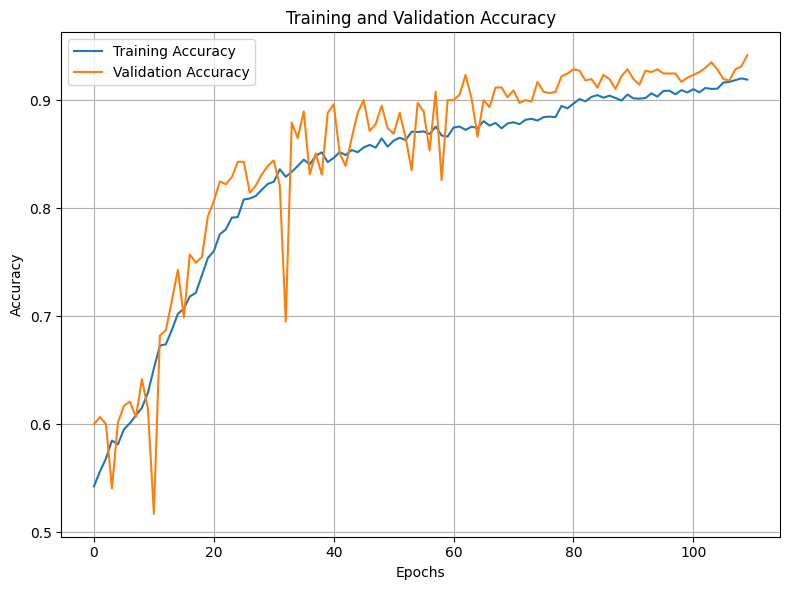

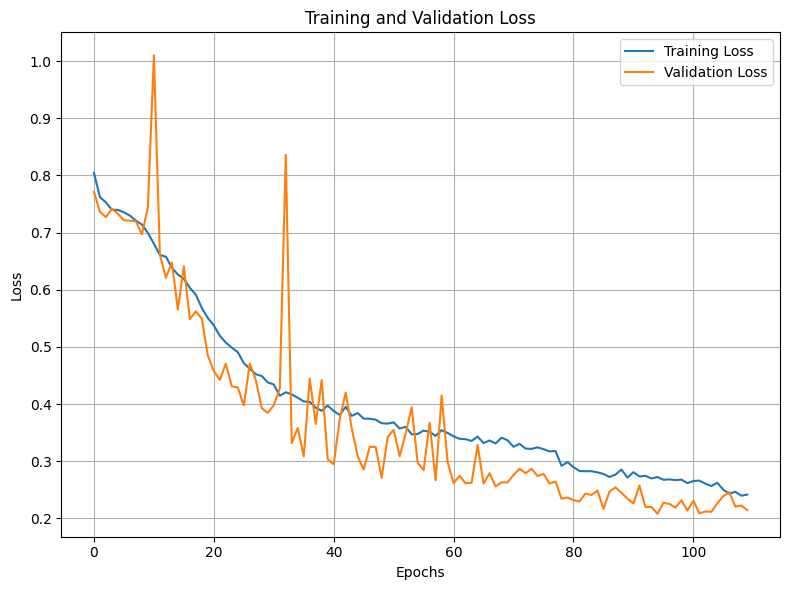

In [ ]:
# Plot Accuracy (no markers)
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Loss (no markers)
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [90]:
# Save the final model
model.save('Custom_CNN_Final.keras')
print("Model saved as 'Custom_CNN_Final.keras'")

Model saved as 'Custom_CNN_Final.keras'


In [91]:
# Load the model
import tensorflow as tf
loaded_model = tf.keras.models.load_model('./Custom_CNN_Final.keras')  

Found 770 images belonging to 2 classes.
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9017 - loss: 0.2884
Test Loss: 0.2526, Test Accuracy: 0.9169
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


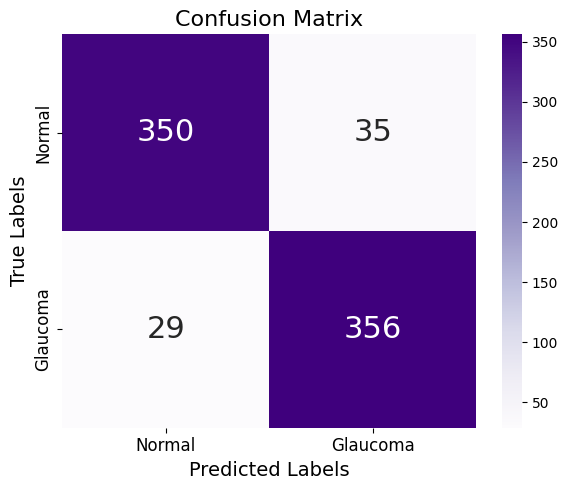

AUC Score: 0.9728


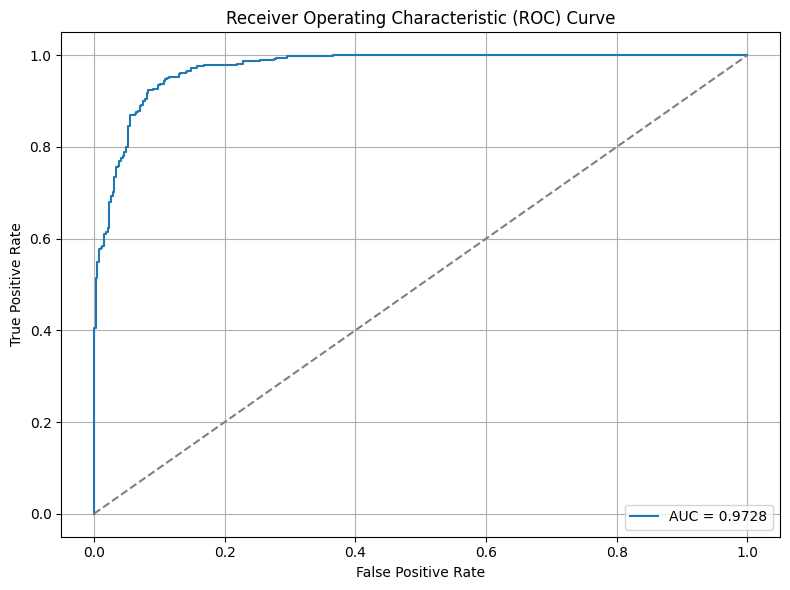

,precision,recall,f1-score,support
Normal,0.923483,0.909091,0.916230,385.000000
Glaucoma,0.910486,0.924675,0.917526,385.000000
accuracy,0.916883,0.916883,0.916883,0.916883
macro avg,0.916984,0.916883,0.916878,770.000000
weighted avg,0.916984,0.916883,0.916878,770.000000


In [93]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve


test_path = './test'
datagen = ImageDataGenerator(rescale=1./255)
test_batches = datagen.flow_from_directory(
    directory=test_path, target_size=(img_height, img_width), batch_size=batch_size, shuffle=False, class_mode='binary'
)

# Model Evaluation
score = loaded_model.evaluate(test_batches, verbose=1)
print(f"Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}")

# Predictions
pred = loaded_model.predict(test_batches, verbose=1)
test_labels = test_batches.labels

# If sigmoid output
test_pred_labels = np.round(pred).astype(int).flatten()

# Generate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_pred_labels)

# Define class names
class_names = ['Normal', 'Glaucoma']

# Create the heatmap
plt.figure(figsize=(6, 5))
sb.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples',
           xticklabels=class_names,
           yticklabels=class_names,
           annot_kws={"size": 22})  # Large numbers in cells

# Set axis labels and title
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Confusion Matrix', fontsize=16)

plt.tight_layout()
plt.show()

# AUC Score (needs predicted probabilities)
auc_score = roc_auc_score(test_labels, pred)
print(f"AUC Score: {auc_score:.4f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(test_labels, pred)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
# Classification Report
test_report = classification_report(test_labels, test_pred_labels,
                                    target_names=['Normal', 'Glaucoma'],
                                    output_dict=True)
test_df = pd.DataFrame(test_report).transpose()
test_df



In [26]:
# Confidence Intervals for Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)
from tqdm import tqdm
import numpy as np

# Number of bootstrap iterations
n_iterations = 10000
rng = np.random.default_rng(seed=42)

# Metric containers
acc_scores = []
auc_scores = []

prec_0, prec_1 = [], []
rec_0, rec_1 = [], []
f1_0, f1_1 = [], []

# Bootstrapping loop
for _ in tqdm(range(n_iterations), desc="Bootstrapping"):
    indices = rng.choice(len(test_labels), len(test_labels), replace=True)
    y_true_sample = test_labels[indices]
    y_pred_sample = test_pred_labels[indices]
    y_prob_sample = pred[indices]

    acc_scores.append(accuracy_score(y_true_sample, y_pred_sample))
    auc_scores.append(roc_auc_score(y_true_sample, y_prob_sample))

    precision = precision_score(y_true_sample, y_pred_sample, average=None, zero_division=0)
    recall = recall_score(y_true_sample, y_pred_sample, average=None, zero_division=0)
    f1 = f1_score(y_true_sample, y_pred_sample, average=None, zero_division=0)

    prec_0.append(precision[0])
    prec_1.append(precision[1])
    rec_0.append(recall[0])
    rec_1.append(recall[1])
    f1_0.append(f1[0])
    f1_1.append(f1[1])

# Confidence interval function
def ci_bounds(metric_scores, confidence=0.95):
    lower = np.percentile(metric_scores, (1 - confidence) / 2 * 100)
    upper = np.percentile(metric_scores, (1 + confidence) / 2 * 100)
    return round(lower * 100, 2), round(upper * 100, 2)

# Print results with proper 95% CI format
print("\nMetric Estimates with 95% CI:")

# Overall metrics
acc_ci = ci_bounds(acc_scores)
auc_ci = ci_bounds(auc_scores)
print(f"Accuracy: {round(np.mean(acc_scores) * 100, 2)}% [95% CI: {acc_ci[0]}–{acc_ci[1]}]")
print(f"AUC Score: {round(np.mean(auc_scores) * 100, 2)}% [95% CI: {auc_ci[0]}–{auc_ci[1]}]")

# Class 0 (Normal)
print("\nNormal (Class 0):")
print(f"Precision: {round(np.mean(prec_0) * 100, 2)}% [95% CI: {ci_bounds(prec_0)[0]}–{ci_bounds(prec_0)[1]}]")
print(f"Recall: {round(np.mean(rec_0) * 100, 2)}% [95% CI: {ci_bounds(rec_0)[0]}–{ci_bounds(rec_0)[1]}]")
print(f"F1 Score: {round(np.mean(f1_0) * 100, 2)}% [95% CI: {ci_bounds(f1_0)[0]}–{ci_bounds(f1_0)[1]}]")

# Class 1 (Glaucoma)
print("\nGlaucoma (Class 1):")
print(f"Precision: {round(np.mean(prec_1) * 100, 2)}% [95% CI: {ci_bounds(prec_1)[0]}–{ci_bounds(prec_1)[1]}]")
print(f"Recall: {round(np.mean(rec_1) * 100, 2)}% [95% CI: {ci_bounds(rec_1)[0]}–{ci_bounds(rec_1)[1]}]")
print(f"F1 Score: {round(np.mean(f1_1) * 100, 2)}% [95% CI: {ci_bounds(f1_1)[0]}–{ci_bounds(f1_1)[1]}]")




Bootstrapping: 100%|██████████| 10000/10000 [00:43<00:00, 227.82it/s]


Metric Estimates with 95% CI:
Accuracy: 91.7% [95% CI: 89.74–93.64]
AUC Score: 97.29% [95% CI: 96.29–98.18]

Normal (Class 0):
Precision: 92.36% [95% CI: 89.58–94.96]
Recall: 90.91% [95% CI: 87.94–93.71]
F1 Score: 91.62% [95% CI: 89.54–93.62]

Glaucoma (Class 1):
Precision: 91.05% [95% CI: 88.04–93.8]
Recall: 92.48% [95% CI: 89.74–95.04]
F1 Score: 91.75% [95% CI: 89.64–93.7]


In [ ]:
import tensorflow as tf
import numpy as np
import time

# Warm-up the model (important!)
_ = loaded_model.predict(next(iter(test_batches))[0], verbose=0)

# Create a test input (you can change shape if needed)
sample_input = np.random.rand(1, 224, 224, 3).astype(np.float32)

# Convert model to callable function for optimization
@tf.function
def run_inference(x):
    return model(x, training=False)

# Run several dry runs to warm up TensorFlow internals
for _ in range(10):
    _ = run_inference(sample_input)

# Time the inference using tf.profiler-like accuracy
repeats = 100
start = time.perf_counter()
for _ in range(repeats):
    _ = run_inference(sample_input)
end = time.perf_counter()

avg_time = (end - start) / repeats
print(f"🧪 Stable Average Inference Time per Image: {avg_time * 1000:.4f} ms")


🧪 Stable Average Inference Time per Image: 3.4836 ms


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


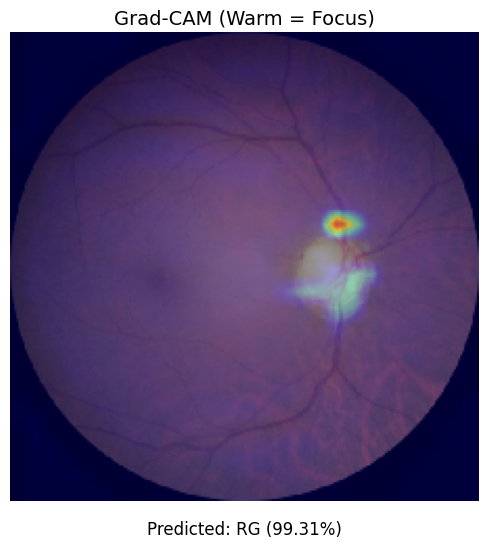

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Grad-CAM Heatmap Generator (normal heatmap, not inverted data)
def make_gradcam_heatmap(model, img_array, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_channel = predictions[:, pred_index]

    grads = tape.gradient(class_channel, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # Normalize heatmap
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap + tf.keras.backend.epsilon())

    return heatmap.numpy()

# Display Grad-CAM with inverted colormap but warm = focus
def display_gradcam(img_path, model, last_conv_layer_name, class_indices):
    # Load and preprocess image
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array / 255.0, axis=0)

    # Predict
    pred_prob = model.predict(img_array)[0][0]
    pred_class = int(pred_prob >= 0.5)
    reverse_class_indices = {v: k for k, v in class_indices.items()}
    label = f"Predicted: {reverse_class_indices[pred_class]} ({pred_prob:.2%})"

    # Grad-CAM heatmap
    heatmap = make_gradcam_heatmap(model, img_array, last_conv_layer_name)
    heatmap = cv2.resize(heatmap, (img.size[0], img.size[1]))
    heatmap = np.uint8(255 * heatmap)

    # Invert colormap: high value = red (warm focus), low = blue
    heatmap_color = cv2.applyColorMap(255 - heatmap, cv2.COLORMAP_JET)

    # Overlay heatmap on original image
    original_image = np.array(img).astype(np.uint8)
    superimposed_img = cv2.addWeighted(original_image, 0.6, heatmap_color, 0.4, 0)

    # Display with clean layout and title/text
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(superimposed_img)
    ax.axis('off')
    plt.title("Grad-CAM (Warm = Focus)", fontsize=14)

    # Add prediction text below image
    fig.text(0.5, 0.05, label, ha='center', fontsize=12)
    plt.tight_layout(rect=[0, 0.08, 1, 0.95])
    plt.show()


# Run Grad-CAM
img_path = r"./test/RG/EyePACS-TRAIN-RG-2898.jpg"  # Your image path
last_conv_layer_name = 'last_conv'  # Replace with your model’s last conv layer
display_gradcam(img_path, loaded_model, last_conv_layer_name, test_batches.class_indices)


In [ ]:
import visualkeras
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from PIL import ImageFont

# Load model 
model = loaded_model

# Define colors for each type of layer
color_map = {
    'Conv2D': '#66c2a5',
    'BatchNormalization': '#fc8d62',
    'MaxPooling2D': '#8da0cb',
    'GlobalAveragePooling2D': '#e78ac3',
    'Dense': '#a6d854',
    'Dropout': '#ffd92f',
    'InputLayer': '#e5c494'
}

# Load a bold and large font for better visibility
try:
    font = ImageFont.truetype("arialbd.ttf", 28)  # Bold font (arialbd.ttf) at larger size
except OSError:
    font = ImageFont.load_default()

# Callable function for detailed text with stacked format to avoid overlap
def text_callable(layer_index, layer):
    above = True
    details = []

    if hasattr(layer, 'output_shape'):
        output_shape = [x for x in list(layer.output_shape) if x is not None]
        if isinstance(output_shape[0], tuple):
            output_shape = [x for x in list(output_shape[0]) if x is not None]
        shape_txt = 'Out:\n' + '\n'.join(map(str, output_shape))
        details.append(shape_txt)

    if isinstance(layer, Conv2D):
        kernel = layer.kernel_size
        filters = layer.filters
        details.append(f'Filters:\n{filters}\nKernel:\n{kernel[0]}x{kernel[1]}')

    elif isinstance(layer, MaxPooling2D):
        pool = layer.pool_size
        details.append(f'Pool:\n{pool[0]}x{pool[1]}')

    elif isinstance(layer, Dense):
        units = layer.units
        details.append(f'Units:\n{units}')

    label = f'{layer.name}\n' + '\n'.join(details)
    return label, above

# Generate visualization with expanded spacing between layers
visualkeras.layered_view(
    model,
    legend=True,
    draw_volume=True,
    spacing=10,        
    scale_xy=2,        
    scale_z=0.5,         
    font=font,
    color_map=color_map,
    type_ignore=['Dropout'],
    text_callable=text_callable,
    to_file='cnn_model_visualization.png'
).show()


/home/tiamat_hd/ThesisWork/lib/python3.12/site-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")
